## Importar librerías

In [12]:

import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt

## Consideraciones

* La columna Values_code contiene un solo valor, por lo cual es redundante. Pero será conservada porque se entiende que puede ser importante en un panoráma más amplio. 

## Conclusiones

1 - ¿Cuál ha sido la generación diaria de los últimos 30 días?

En los últimos 30 días se han generado 241117.8 kWh, con valores máximos entre el 20 y el 22 de noviembre. Y valores mínimos el 24 de noviembre.

2 - ¿Cuánta energía en total ha generado cada mes durante todo el año?

Durante todo el año se generaron 3227279 kWh. Principalmente durante los meses de junio. julio y agosto. La posible razón es que en estos meses se tiene una mayor disponibilidad de radiación solar y en vista de que Santa Fe energy genera energía parcialmente con paneles solares a eso pudo deberse el aumento. Otra razón puede deberse a un aumento en la demanda.

3 - ¿Cuáles son las horas donde se genera más energía y las horas donde se genera menos?

Las horas donde se genera la mayor cantidad de energia es entre las 3 de la tarde y las 8 de la noche.
Las horas donde menos se genera energia es generalmente entre las 4 y las 7 am.

4 - ¿Cómo es la distribución y qué tan dispersa es la generación en cada mes?

En general la generación de energía es bastanate dispersa y con presencia considerable de valores atípicos (extremos) excepto por los meses de mayo a julio donde la generación está un poco más agrupada.

En febrero, marzo, abril y octubre se tiene la mayor variación en la generación de energía.



In [33]:

## Lectura de los datos
df_inicial = pd.read_csv('GeneraciónCauya2024.csv')

##Transformar la columna de fechas a DateTime
df_inicial['Date'] = pd.to_datetime(df_inicial['Date'])
##Ordenar los datos por fecha y reiniciar el indice

df_inicial.sort_values(by='Date',inplace=True)
df_inicial.reset_index(drop=True,inplace=True)
##Definir estilo gráfico

plt.style.use('ggplot')

## Verificar los datos

In [34]:
df_inicial.info() ## Hay valores nulos

##cuantificar los valores nulos

cantidad_nulos = []
porcentaje_nulos = []
for i,col in enumerate(df_inicial):
    nulos = df_inicial[col].isna().sum()
    porcentaje = nulos/df_inicial.shape[0]
    cantidad_nulos.append(nulos)
    porcentaje_nulos.append(porcentaje)

df_nulos = pd.DataFrame({"Nulos":cantidad_nulos,"Porcentaje (%)":porcentaje_nulos},index=df_inicial.columns).sort_values(by="Nulos",ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     349 non-null    int64         
 1   Id             349 non-null    object        
 2   Values_code    349 non-null    object        
 3   Values_Hour01  345 non-null    float64       
 4   Values_Hour02  347 non-null    float64       
 5   Values_Hour03  344 non-null    float64       
 6   Values_Hour04  345 non-null    float64       
 7   Values_Hour05  341 non-null    float64       
 8   Values_Hour06  344 non-null    float64       
 9   Values_Hour07  342 non-null    float64       
 10  Values_Hour08  343 non-null    float64       
 11  Values_Hour09  343 non-null    float64       
 12  Values_Hour10  342 non-null    float64       
 13  Values_Hour11  343 non-null    float64       
 14  Values_Hour12  341 non-null    float64       
 15  Values_Hour13  342 non-

In [ ]:
### Según las indicaciones, los valores nulos corresponden a horas en las cuales NO hubo generacion en esa hora. Por ende puede ser reemplazado por ceros.

##El dataframe df_nulos confirma que solo hay nulos en las columnas de las horas, por lo cual se puede usar el método fillna() para reemplazar dichos valores por ceros

df = df_inicial.fillna(0)

##verificar la presencia de valores duplicados

df.duplicated().sum() ##No hay valores duplicados

df['Date'].tail(30)  ##No se tiene datos de la totalidad de los días. Por ejemplo, falta información del  2024-11-25 y 2024-11-26.
##Se tomarán exactamente 30 días desde la fecha final hacia atrás a pesar de la ausencia de algunos días de datos

df_30dias_atras = df.tail(30).drop(columns=['Unnamed: 0','Id', 'Values_code',"Date"])

### ¿Cuál ha sido la generación diaria de los últimos 30 días?

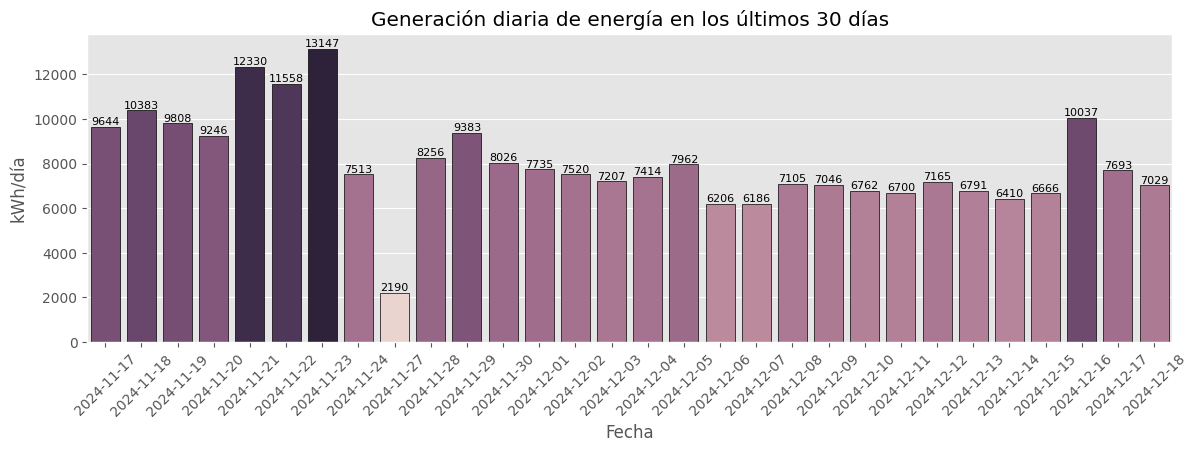

In [182]:
##para ello, hace falta sumar la energia por hora de cada día.

##hay que garantizar que la suma se realiza solo en la columnas Values_Hour

df_30_dias_energia = df_30dias_atras.drop(columns=['Unnamed: 0','Id', 'Values_code',"Date"])

generacion_ultimos30dias = df_30_dias_energia.sum(axis=1)

##Ahora, nuevamente unimos los datos

ultimos_30dias = pd.concat([df_30dias_atras['Date'],generacion_ultimos30dias],axis=1).rename(columns={"Date":'Fecha',0:"kWh/dia"})


##generar visualización

fig, ax = plt.subplots(figsize=(14,4))

bar = sns.barplot(data=ultimos_30dias,x='Fecha',y='kWh/dia',hue='kWh/dia',legend=None,edgecolor='k')
ax.tick_params(axis='x',rotation=45)


ax.set_title('Generación diaria de energía en los últimos 30 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('kWh/día')

for etiqueta in bar.containers:
    ax.bar_label(etiqueta,fmt='%.0f',fontsize=8)

plt.show()
plt.close()

In [181]:
ultimos_30dias['kWh/dia'].sum()

241117.8

### ¿Cuánta energía en total ha generado cada mes durante todo el año?

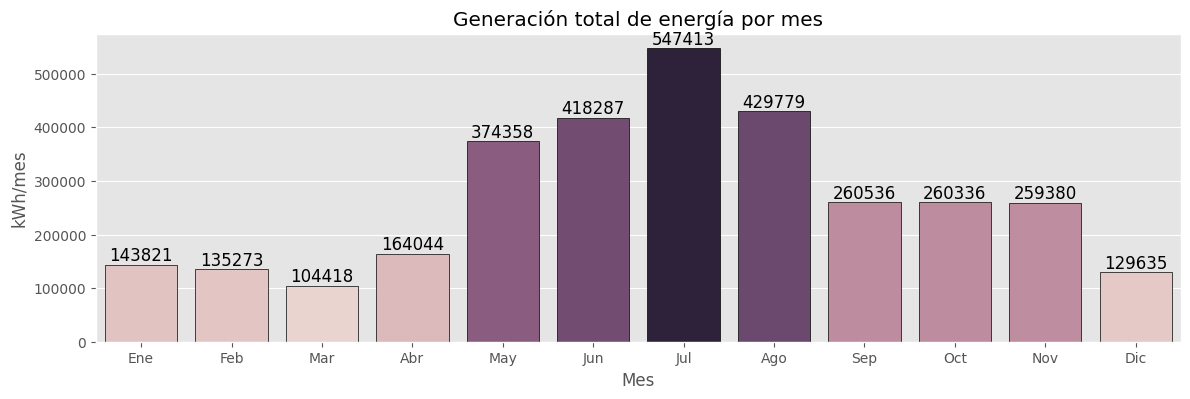

In [184]:
##Hace falta agrupar los valores por mes

##Vale la pena crear un df solo con fechas y energia
df_energia = df.drop(columns=['Unnamed: 0','Id', 'Values_code'])
##Aqui vale la pena usar pd.metl

# df_energia_largo = pd.melt(df_energia,)

df_transpuesto = pd.melt(df_energia,id_vars='Date')

##Ahora hace falta agrupar por meses y sumar la energia del respectivo dia

df_mensual = df_transpuesto.groupby(df_transpuesto['Date'].dt.month)['value'].sum().reset_index()

## visualizacion


fig, ax = plt.subplots(figsize=(14,4))

bar = sns.barplot(data=df_mensual,x='Date',y='value',hue='value',legend=None,edgecolor='k')
meses = ["Ene",'Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

ax.set_xticks(range(len(meses)))
ax.set_xticklabels(meses)
ax.set_xlabel('Mes')
ax.set_ylabel('kWh/mes')
ax.set_title('Generación total de energía por mes')

for etiqueta in bar.containers:
    ax.bar_label(etiqueta,fmt='%.0f',fontsize=12)

plt.show()
plt.close()

In [186]:
df_mensual['value'].sum() ##total generado en el año

3227279.0

### ¿Cuáles son las horas donde se genera más energía y las horas donde se genera menos?

In [145]:
##Nuevamente puedo usar el df transpuesto, esta vez agrupando por hora y con las medidas de agregacion max y min

max_min_horario = df_transpuesto.groupby("variable")['value'].agg(['max','min'])

##Aal hacer esto, el valor mínimo es cero. Para hallar cual es la generacion minima diferente de cero es necesario filtrar el DF para omitir dicho valor

max_min_horario_sinCeros = df_transpuesto.loc[df_transpuesto['value']>0].groupby("variable")['value'].agg(['max','min'])

##cambiar nombre de las horas

horas = [i+1 for i in range(24)]
max_min_horario_sinCeros.index = horas
max_min_horario_sinCeros.reset_index(inplace=True)

columnas = ["Hora","Máximo","Mínimo"]
max_min_horario_sinCeros.columns = columnas
##Visualizacion

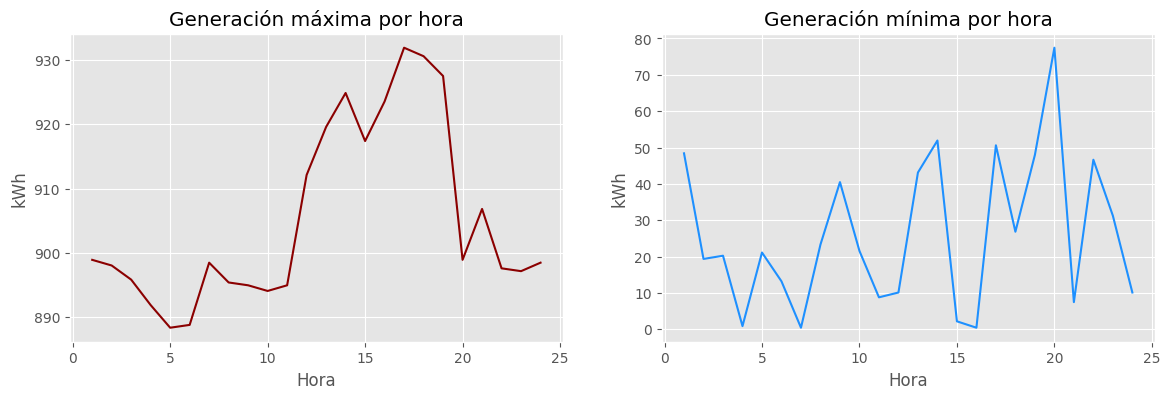

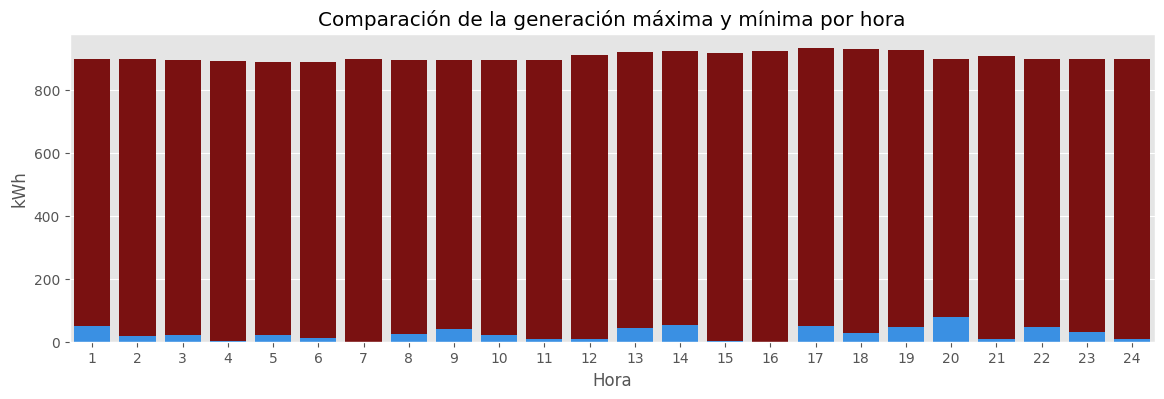

In [159]:
fig, ax = plt.subplots(figsize=(14,4),ncols=2)

sns.lineplot(data=max_min_horario_sinCeros,x='Hora',y='Máximo',color='darkred',ax=ax[0])
sns.lineplot(data=max_min_horario_sinCeros,x='Hora',y='Mínimo',color='dodgerblue',ax=ax[1])

ax[0].set_xlabel('Hora')
ax[1].set_xlabel('Hora')
ax[0].set_ylabel('kWh')
ax[1].set_ylabel('kWh')

ax[0].set_title('Generación máxima por hora')
ax[1].set_title('Generación mínima por hora')
plt.show()
plt.close()
##tercer grafico comparando ambos

fig, ax = plt.subplots(figsize=(14,4))
sns.barplot(data=max_min_horario_sinCeros,x='Hora',y='Máximo',color='darkred')
sns.barplot(data=max_min_horario_sinCeros,x='Hora',y='Mínimo',color='dodgerblue')
ax.set_title('Comparación de la generación máxima y mínima por hora')
ax.set_xlabel('Hora')
ax.set_ylabel('kWh')
plt.show()
plt.close()
# for etiqueta in bar.containers:
#     ax.bar_label(etiqueta)

### ¿Cómo es la distribución y qué tan dispersa es la generación en cada mes?

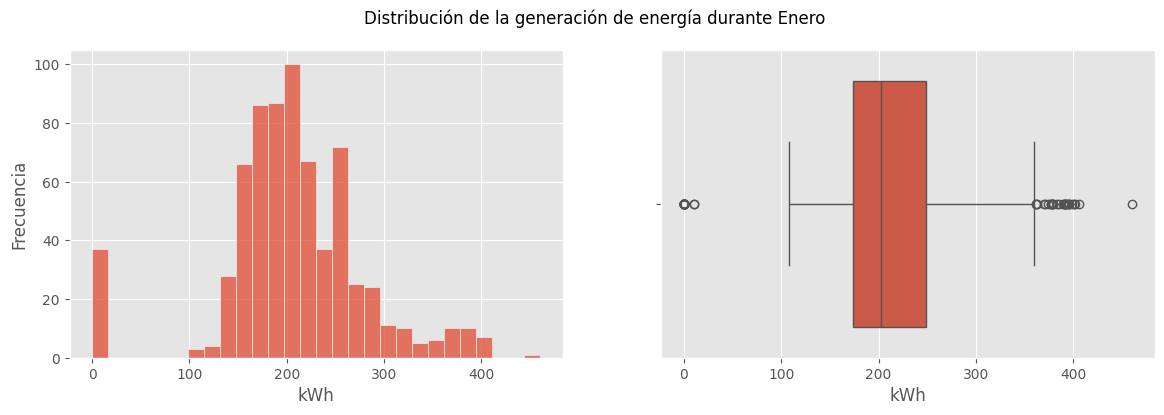

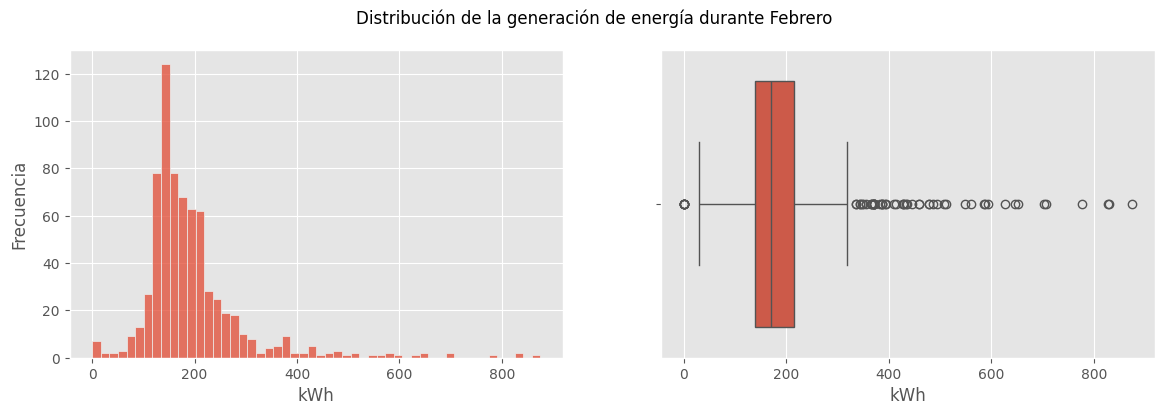

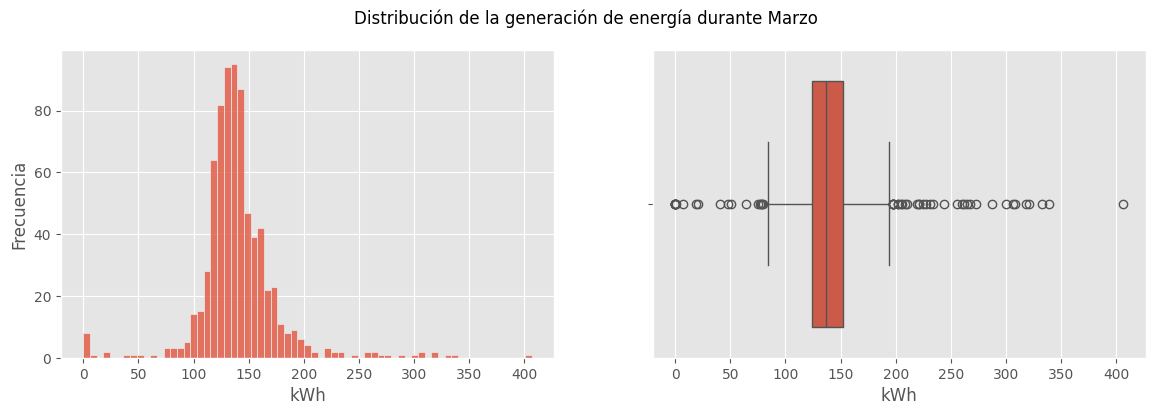

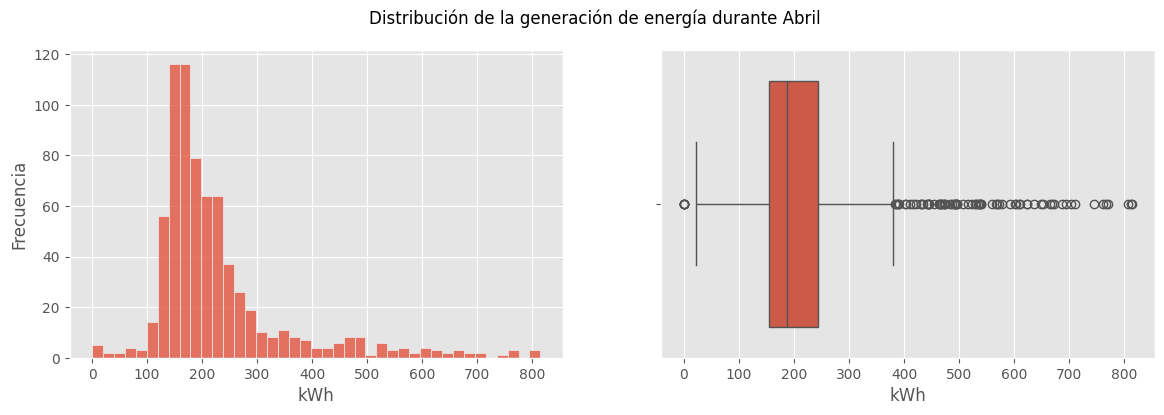

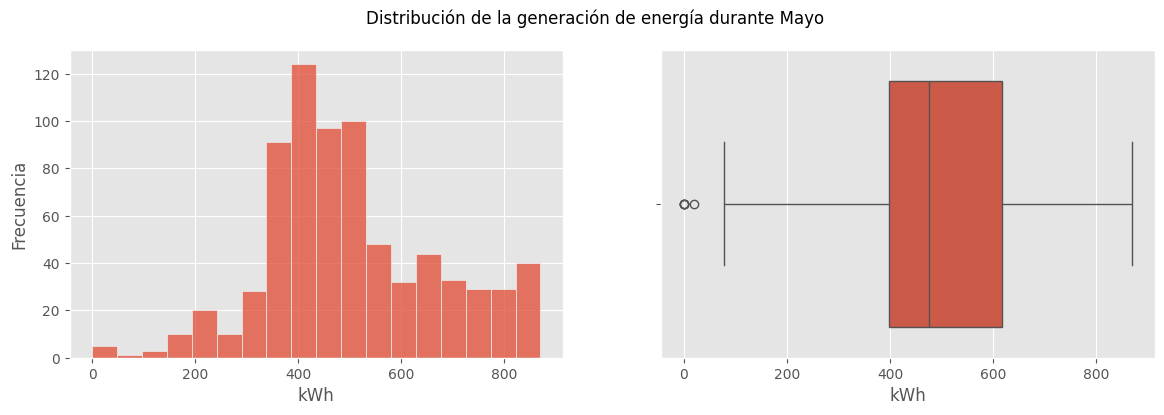

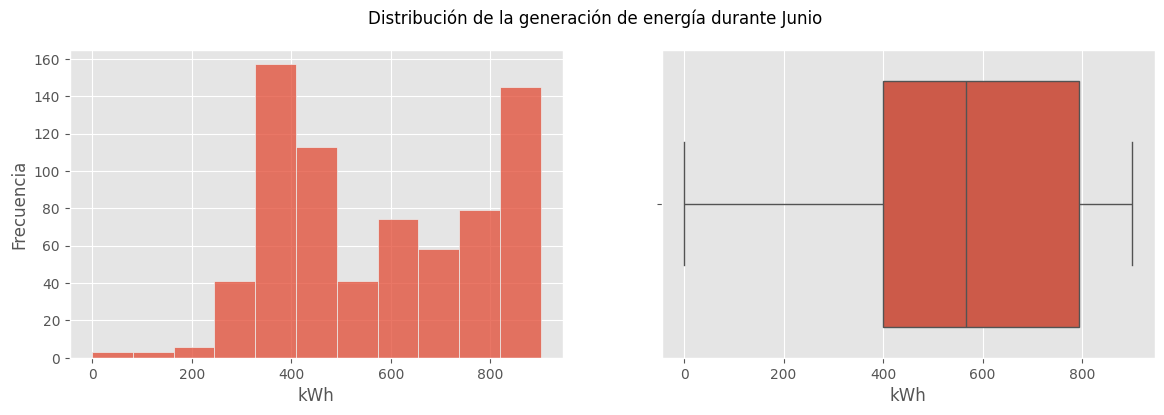

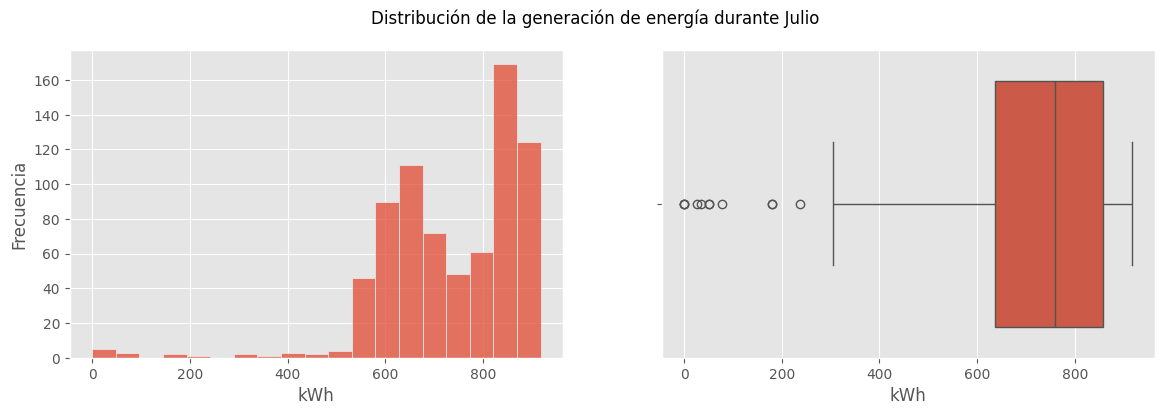

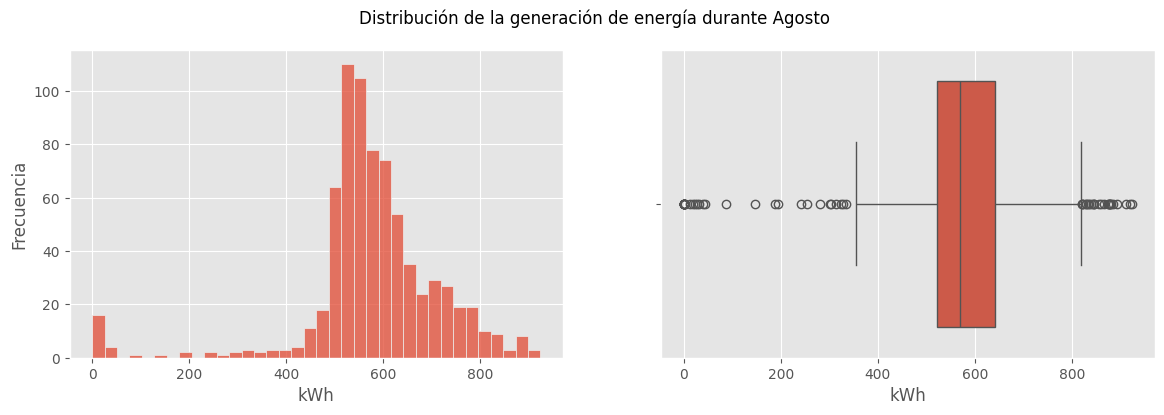

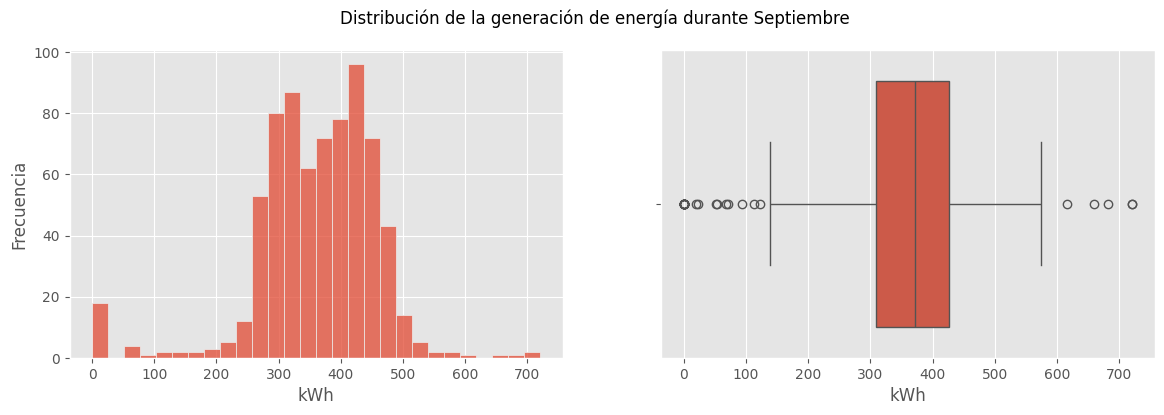

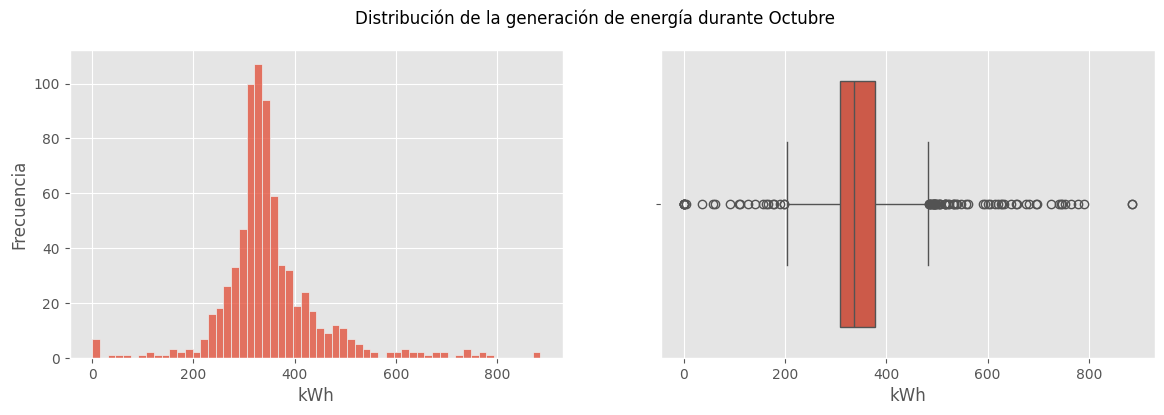

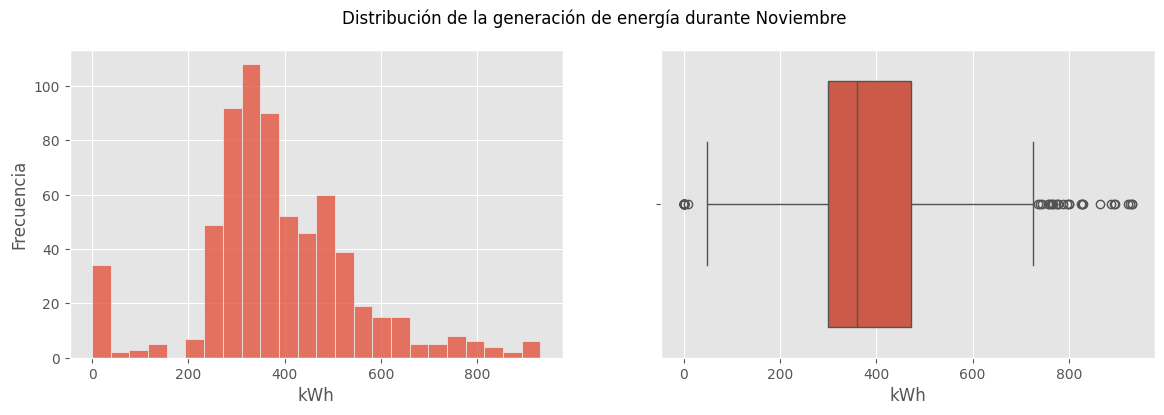

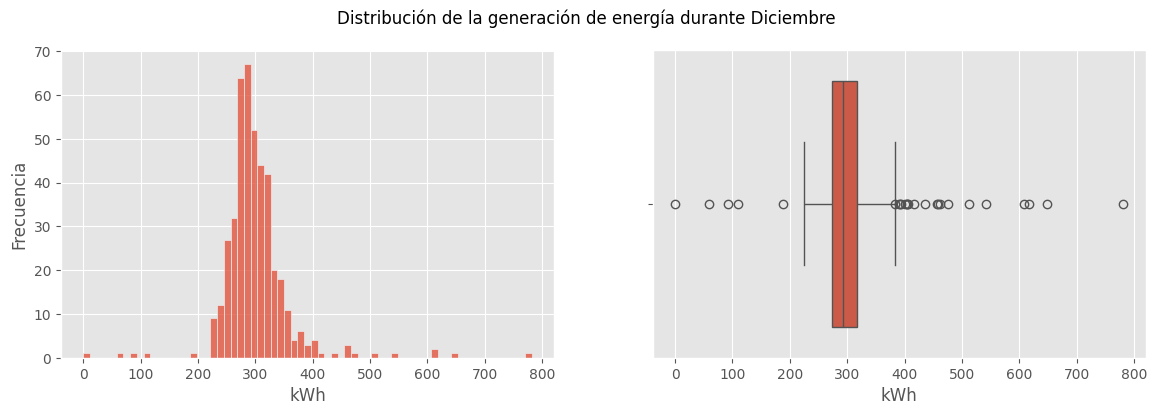

In [187]:
##vamos a grupar la información por meses y obtener sus histogramas y boxplots para determinar la distribución y dispersión de los datos

agrupacion_mensual = []
meses = ["Enero",'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
for i in range(12):
    agrupacion_mensual.append(df_transpuesto.loc[df_transpuesto['Date'].dt.month==i+1])

for i, col in enumerate(agrupacion_mensual):

    fig, ax = plt.subplots(figsize=(14,4),ncols=2)

    sns.histplot(data=agrupacion_mensual[i],x='value',ax=ax[0])
    sns.boxplot(data=agrupacion_mensual[i],x='value',ax=ax[1])

    ax[0].set_xlabel('kWh')
    ax[1].set_xlabel('kWh')
    ax[0].set_ylabel('Frecuencia')
    fig.suptitle(f"Distribución de la generación de energía durante {meses[i]}")
    plt.show()
    plt.close()